# Simulation

In [1]:
import random
import csv

# Define the amino acid sequence of the peptide
peptide_sequence = "ACDEFGHIKLMNPQRSTVWY"

# Define the simulation parameters
temperature = 300  # Temperature in Kelvin
num_steps = 1000  # Number of simulation steps
time_step = 1e-12  # Time step in seconds
picoseconds = num_steps * time_step * 1e12  # Total simulation time in picoseconds

# Calculate the energy of the peptide conformation
def calculate_energy(conformation):
    # Define energy parameters (example values)
    contact_energy = -1
    torsional_energy = -0.5

    # Calculate contact energy as the number of neighboring residues
    contact_energy_term = sum(1 for i in range(len(conformation) - 1) if abs(conformation[i] - conformation[i+1]) == 1)

    # Calculate torsional energy as the sum of dihedral angles
    torsional_energy_term = sum(conformation)

    # Calculate total energy as the sum of contact and torsional energies
    total_energy = contact_energy * contact_energy_term + torsional_energy * torsional_energy_term
    return total_energy

# Simulate the peptide conformation
def simulate_peptide():
    # Generate initial random conformation
    conformation = [random.randint(-180, 180) for _ in range(len(peptide_sequence))]

    # Initialize best conformation and energy
    best_conformation = conformation
    best_energy = calculate_energy(conformation)

    # Perform simulation steps
    energies = []
    for _ in range(num_steps):
        # Randomly select an index to perturb
        index = random.randint(0, len(peptide_sequence) - 1)

        # Generate a random perturbation angle
        perturbation = random.randint(-10, 10)

        # Update the conformation with the perturbation
        conformation[index] += perturbation

        # Calculate the new energy of the conformation
        new_energy = calculate_energy(conformation)

        # Accept or reject the new conformation based on energy difference
        if new_energy < best_energy:
            # Update the best conformation and energy
            best_conformation = conformation
            best_energy = new_energy

        # Store the energy at each step
        energies.append(best_energy)

    return best_conformation, energies

# Run the simulation
best_conformation, energies = simulate_peptide()

# Save the results to a CSV file
with open("simulation_results.csv", "w", newline="") as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["Time (ps)", "Energy"])
    for i, energy in enumerate(energies):
        time = (i + 1) * time_step * 1e12  # Calculate time in picoseconds
        writer.writerow([time, energy])

# Print the results
print("Best conformation:", best_conformation)
print("Total simulation time:", picoseconds, "ps")
print("Saved results to simulation_results.csv file.")


Best conformation: [-182, 102, 62, 168, 18, 210, -138, -29, -198, -129, -98, -141, 150, -177, 34, -190, 128, 4, 180, 70]
Total simulation time: 1000.0000000000001 ps
Saved results to simulation_results.csv file.


# Analysis

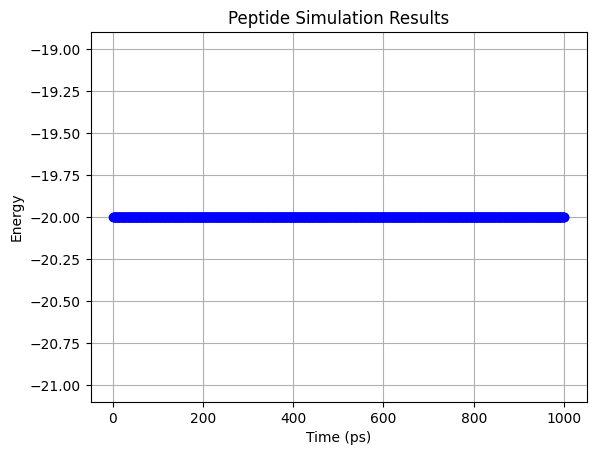

In [2]:
import matplotlib.pyplot as plt

# Read the results from the CSV file
times = []
energies = []
with open("simulation_results.csv", "r") as csvfile:
    reader = csv.reader(csvfile)
    next(reader)  # Skip the header row
    for row in reader:
        time = float(row[0])
        energy = float(row[1])
        times.append(time)
        energies.append(energy)

# Plot the energy graph
plt.plot(times, energies, '-o', color='blue')
plt.xlabel("Time (ps)")
plt.ylabel("Energy")
plt.title("Peptide Simulation Results")
plt.grid(True)

# Save the graph as an image file
plt.savefig("simulation_graph.png")

# Show the graph
plt.show()
